<div style="color:white;background-color:Black;padding:3%;border-radius:150px 150px;font-size:2.5em;text-align:center">Pandas toolkit Part 2</div>

Pandas

<center>
<img src="https://i1.wp.com/www.datascienceexamples.com/wp-content/uploads/2019/10/python-and-pandas.jpg?resize=800%2C286&ssl=1" width=1200>
</center>

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    1
2    5
3    2
4    5
5    6
6    0
7    2
8    3
9    0
dtype: int64

In [3]:
s.value_counts()

0    3
5    2
2    2
1    1
6    1
3    1
dtype: int64

In [4]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [5]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.068815,0.673521,1.012656,-0.364331
1,0.784435,0.488602,-0.569797,-0.761582
2,1.329406,0.421736,-0.648960,0.433888
3,-0.549131,-0.707169,0.171735,0.866205
4,0.142445,1.402472,1.098459,0.050017
5,0.736217,-0.076936,-2.265664,-0.142741
6,1.551464,0.522575,1.702323,1.130319
7,0.129066,-1.015991,0.392683,-0.460993
8,0.502011,-0.720044,-0.361592,0.509013
9,0.608325,-1.122808,-1.052589,-0.374906


In [6]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.068815,0.673521,1.012656,-0.364331
1,0.784435,0.488602,-0.569797,-0.761582
2,1.329406,0.421736,-0.648960,0.433888
3,-0.549131,-0.707169,0.171735,0.866205
4,0.142445,1.402472,1.098459,0.050017
5,0.736217,-0.076936,-2.265664,-0.142741
6,1.551464,0.522575,1.702323,1.130319
7,0.129066,-1.015991,0.392683,-0.460993
8,0.502011,-0.720044,-0.361592,0.509013
9,0.608325,-1.122808,-1.052589,-0.374906


In [7]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [8]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [9]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [10]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [11]:
df = pd.DataFrame({
    
"A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
"B": ["one", "one", "two", "three", "two", "two", "one", "three"],
"C": np.random.randn(8),
"D": np.random.randn(8)
    
     })
df

,A,B,C,D
0,foo,one,0.505649,-0.260319
1,bar,one,0.600184,0.193859
2,foo,two,-1.956291,1.553813
3,bar,three,0.272403,0.446928
4,foo,two,-1.811527,0.435463
5,bar,two,-2.195349,0.383274
6,foo,one,0.865699,-1.578711
7,foo,three,-0.794270,-1.726390


In [12]:
df.groupby("A").sum()

/tmp/ipykernel_20/10288373.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("A").sum()


,C,D
A,,
bar,-1.322761,1.024061
foo,-3.190741,-1.576144


In [13]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.600184  0.193859
    three  0.272403  0.446928
    two   -2.195349  0.383274
foo one    1.371348 -1.839030
    three -0.794270 -1.726390
    two   -3.767819  1.989276

In [14]:
tuples = list(zip(*[
["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
["one", "two", "one", "two", "one", "two", "one", "two"]
]))

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.016804  0.170623
      two     0.243215  0.034271
baz   one     0.503628  0.160551
      two    -1.057154 -0.981320

In [15]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.016804
               B    0.170623
       two     A    0.243215
               B    0.034271
baz    one     A    0.503628
               B    0.160551
       two     A   -1.057154
               B   -0.981320
dtype: float64

In [16]:
stacked.unstack()

A         B
first second                    
bar   one    -1.016804  0.170623
      two     0.243215  0.034271
baz   one     0.503628  0.160551
      two    -1.057154 -0.981320

In [17]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.016804  0.243215
      B  0.170623  0.034271
baz   A  0.503628 -1.057154
      B  0.160551 -0.981320

In [18]:
df = pd.DataFrame({
    
"A": ["one", "one", "two", "three"] * 3,
"B": ["A", "B", "C"] * 4,
"C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
"D": np.random.randn(12),
"E": np.random.randn(12)
    
})
df

,A,B,C,D,E
0,one,A,foo,-2.299961,0.333089
1,one,B,foo,-0.224804,1.717136
2,two,C,foo,-0.034556,1.157822
3,three,A,bar,-1.233576,-0.194941
4,one,B,bar,-0.250912,0.552956
5,one,C,bar,0.240696,-0.621469
6,two,A,foo,0.188029,2.194071
7,three,B,foo,-0.318821,2.520378
8,one,C,foo,-1.088277,-0.831787
9,one,A,bar,-0.343089,0.419499


In [19]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.343089 -2.299961
      B -0.250912 -0.224804
      C  0.240696 -1.088277
three A -1.233576       NaN
      B       NaN -0.318821
      C  0.800277       NaN
two   A       NaN  0.188029
      B  0.343656       NaN
      C       NaN -0.034556

In [20]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    24675
Freq: 5T, dtype: int64

In [21]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.731052
2012-03-07    0.879285
2012-03-08    0.934368
2012-03-09   -0.000108
2012-03-10    1.410146
Freq: D, dtype: float64

In [22]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.731052
2012-03-07 00:00:00+00:00    0.879285
2012-03-08 00:00:00+00:00    0.934368
2012-03-09 00:00:00+00:00   -0.000108
2012-03-10 00:00:00+00:00    1.410146
Freq: D, dtype: float64

In [23]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.018115
2012-02-29    0.868672
2012-03-31    0.723367
2012-04-30   -0.947665
2012-05-31   -1.058658
Freq: M, dtype: float64

In [24]:
ps = ts.to_period()
ps

2012-01    0.018115
2012-02    0.868672
2012-03    0.723367
2012-04   -0.947665
2012-05   -1.058658
Freq: M, dtype: float64

In [25]:
ps.to_timestamp()

2012-01-01    0.018115
2012-02-01    0.868672
2012-03-01    0.723367
2012-04-01   -0.947665
2012-05-01   -1.058658
Freq: MS, dtype: float64

In [26]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -0.890295
1990-06-01 09:00   -2.364116
1990-09-01 09:00    0.976915
1990-12-01 09:00   -1.051940
1991-03-01 09:00   -1.552272
Freq: H, dtype: float64

In [27]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})
df.head()

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a


In [28]:
df["grade"] = df["raw_grade"].astype("category")
In [125]: df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [29]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

/tmp/ipykernel_20/2985790766.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


In [30]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [31]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [32]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [33]:
import matplotlib.pyplot as plt
plt.close("all")

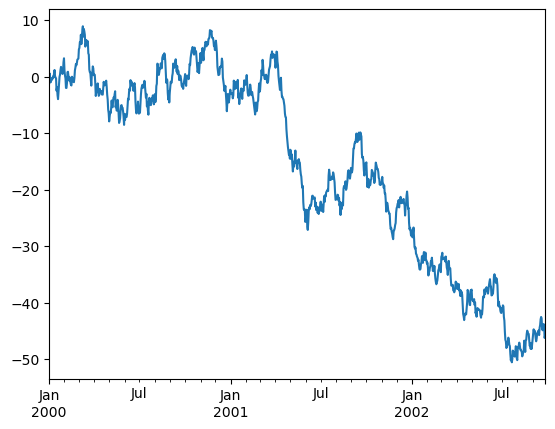

In [34]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

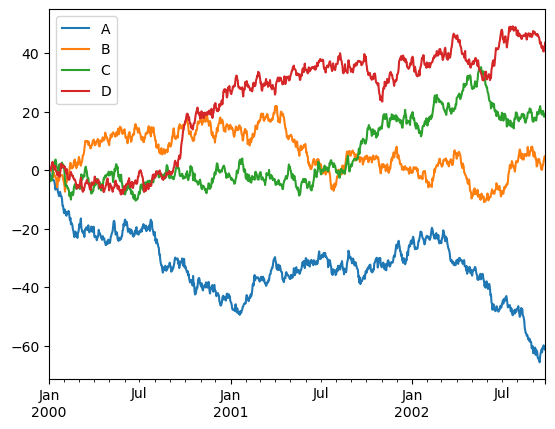

In [35]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"])
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

In [36]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.115798,1.342987,-1.762367,-0.531869
1,2000-01-02,-0.843187,0.937486,-1.903901,0.548560
2,2000-01-03,-1.734581,0.501802,-3.882135,0.523417
3,2000-01-04,-1.896296,0.286051,-3.039623,-0.076931
4,2000-01-05,-1.856498,0.353754,-3.117196,0.694536
...,...,...,...,...,...
995,2002-09-22,-60.953215,1.803217,20.177934,40.833027
996,2002-09-23,-59.861464,2.935109,19.347777,40.487630
997,2002-09-24,-60.816954,3.746188,18.223747,41.848614
998,2002-09-25,-60.144360,4.719265,18.509990,42.081331


In [37]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.115798,1.342987,-1.762367,-0.531869
2000-01-02,-0.843187,0.937486,-1.903901,0.548560
2000-01-03,-1.734581,0.501802,-3.882135,0.523417
2000-01-04,-1.896296,0.286051,-3.039623,-0.076931
2000-01-05,-1.856498,0.353754,-3.117196,0.694536
...,...,...,...,...
2002-09-22,-60.953215,1.803217,20.177934,40.833027
2002-09-23,-59.861464,2.935109,19.347777,40.487630
2002-09-24,-60.816954,3.746188,18.223747,41.848614
2002-09-25,-60.144360,4.719265,18.509990,42.081331


In [38]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.115798,1.342987,-1.762367,-0.531869
1,2000-01-02,-0.843187,0.937486,-1.903901,0.548560
2,2000-01-03,-1.734581,0.501802,-3.882135,0.523417
3,2000-01-04,-1.896296,0.286051,-3.039623,-0.076931
4,2000-01-05,-1.856498,0.353754,-3.117196,0.694536
...,...,...,...,...,...
995,2002-09-22,-60.953215,1.803217,20.177934,40.833027
996,2002-09-23,-59.861464,2.935109,19.347777,40.487630
997,2002-09-24,-60.816954,3.746188,18.223747,41.848614
998,2002-09-25,-60.144360,4.719265,18.509990,42.081331


In [39]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.940277
b   -2.003233
c   -0.369212
d   -0.834211
e    1.183209
dtype: float64

In [40]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [41]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [42]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [43]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [44]:
s[0]

0.9402771424395787

In [45]:
s[:3]

a    0.940277
b   -2.003233
c   -0.369212
dtype: float64

In [46]:
s[s > s.median()]

a    0.940277
e    1.183209
dtype: float64

In [47]:
s[[4, 3, 1]]

e    1.183209
d   -0.834211
b   -2.003233
dtype: float64

In [48]:
np.exp(s)

a    2.560691
b    0.134898
c    0.691279
d    0.434217
e    3.264834
dtype: float64

In [49]:
s.array

<PandasArray>
[ 0.9402771424395787, -2.0032334122765687,  -0.369211802449559,
 -0.8342109639916006,   1.183208990570327]
Length: 5, dtype: float64

In [50]:
s.to_numpy()

array([ 0.94027714, -2.00323341, -0.3692118 , -0.83421096,  1.18320899])

In [51]:
s["a"]

0.9402771424395787

In [52]:
s["e"] = 12.0
s

a     0.940277
b    -2.003233
c    -0.369212
d    -0.834211
e    12.000000
dtype: float64

In [53]:
np.exp(s)

a         2.560691
b         0.134898
c         0.691279
d         0.434217
e    162754.791419
dtype: float64

In [54]:
s[1:] + s[:-1]

a         NaN
b   -4.006467
c   -0.738424
d   -1.668422
e         NaN
dtype: float64

In [55]:
s = pd.Series(np.random.randn(5), name="something")
s

0   -1.080851
1    0.329664
2    2.184577
3   -1.196873
4   -0.568847
Name: something, dtype: float64

In [56]:
s2 = s.rename("different")
s2.name

'different'

In [57]:
d = {
"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
"two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [58]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [59]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [60]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [61]:
df.columns

Index(['one', 'two'], dtype='object')

In [62]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [63]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [64]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [65]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [66]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [67]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [68]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [69]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


In [70]:
pd.DataFrame({
    
("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
("b", "b"): {("A", "D"): 9, ("A", "B"): 10}
    
})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [71]:
from collections import namedtuple
Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [72]:
Point3D = namedtuple("Point3D", "x y z")

In [73]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [74]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [75]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [76]:
pd.DataFrame.from_dict(
dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
orient="index",
columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


In [77]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [78]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [79]:
del df["two"]
three = df.pop("three")
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [80]:
df["foo"] = "bar"
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [81]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [82]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [83]:
iris = pd.read_csv("/kaggle/input/iris/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
iris.assign(sepal_ratio=iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [85]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


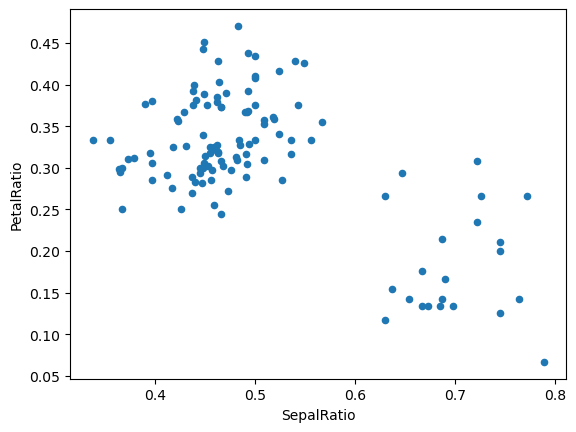

In [86]:
(iris.query("SepalLengthCm > 5").assign(
SepalRatio=lambda x: x.SepalWidthCm / x.SepalLengthCm,
PetalRatio=lambda x: x.PetalWidthCm / x.PetalLengthCm,
).plot(kind="scatter", x="SepalRatio", y="PetalRatio"));

In [87]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [88]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

,A,B,C,D
0,-0.694752,1.022956,2.784821,NaN
1,-2.065189,1.648572,-1.589570,NaN
2,3.232590,-0.381577,-1.590541,NaN
3,0.914759,0.327970,0.645201,NaN
4,1.362235,-0.402413,-0.836598,NaN
5,2.259290,-0.652522,0.192210,NaN
6,0.196668,-0.228691,-0.376418,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [89]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [90]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [91]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [92]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [93]:
np.exp(df)

,A,B,C,D
0,0.398760,3.118393,4.399479,0.673198
1,0.359383,2.603556,0.363580,0.311560
2,8.916438,0.327805,0.543810,0.989345
3,1.835526,0.483326,17.055312,0.344737
4,1.911707,0.409194,0.216461,0.590296
5,0.927895,0.413001,1.266892,0.580170
6,1.038060,1.633353,0.493416,1.923136
7,2.527417,0.677450,5.601381,0.452689
8,1.779148,1.762000,1.006370,3.441888
9,0.683019,10.344068,0.353381,1.548381


In [94]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [95]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])
ser1

a    1
b    2
c    3
dtype: int64

In [96]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

In [97]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

In [98]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

In [99]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.447161,0.933261,-1.934250,-0.126126,1.238725,-1.825639,0.250469,-1.588384,1.492282,0.236705,-0.131273,-1.378702
1,1.559921,-1.235095,-1.259417,0.896727,-1.005432,1.328071,-2.188901,-0.667045,0.710610,-2.145473,0.284789,-0.414535
2,0.579909,-0.588480,0.487699,-0.780761,-0.270559,-1.365715,-0.929236,0.151742,-0.391556,-0.026845,0.772137,-1.003883


In [100]:
pd.set_option("display.width", 40) # default is 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.121577,1.353987,-1.721269,-1.327970,1.544226,-0.466348,-0.410339,-0.485569,0.538453,0.427194,0.988240,-0.196444
1,0.792236,-0.457809,-0.489410,1.791125,-0.414894,-1.059892,0.617498,0.534035,0.526338,0.397094,2.055410,-1.130384
2,0.641827,1.351979,0.354020,1.737896,1.010427,0.650302,-0.896380,0.775551,0.052178,-1.752171,1.011437,-0.866978


In [101]:
datafile = {
"filename": ["filename_01", "filename_02"],
"path": [
"media/user_name/storage/folder_01/filename_01",
"media/user_name/storage/folder_02/filename_02",]
}

pd.set_option("display.max_colwidth", 30)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [102]:
pd.set_option("display.max_colwidth", 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


In [103]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,-0.005058,-1.313017
1,-0.121580,-0.279533
2,1.175663,-0.036851
3,0.623517,-0.044475
4,-0.807418,0.283939


In [104]:
index = pd.date_range("1/1/2000", periods=8)
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

In [105]:
long_series = pd.Series(np.random.randn(1000))
long_series.head()

0    0.090152
1    1.131645
2   -2.492089
3   -0.231828
4    0.588287
dtype: float64

In [106]:
df[:2]

,A,B,C
2000-01-01,2.456382,0.307317,0.605127
2000-01-02,-0.165136,1.083023,1.410186


In [107]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,2.456382,0.307317,0.605127
2000-01-02,-0.165136,1.083023,1.410186
2000-01-03,0.098288,-0.969582,-0.510968
2000-01-04,0.113361,-0.092133,-0.427600
2000-01-05,0.607143,-0.552850,0.056693
2000-01-06,1.693715,-0.463951,0.569550
2000-01-07,-0.417196,0.348843,-0.731802
2000-01-08,0.390654,0.838946,0.278512


In [108]:
s.array

<PandasArray>
[ 0.2708092623757875,
  1.5159349324961227,
  1.1574030121708565,
 -0.3707601320485294,
 -1.0838091093563624]
Length: 5, dtype: float64

In [109]:
s.index.array

<PandasArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object

In [110]:
s.to_numpy()

array([ 0.27080926,  1.51593493,  1.15740301, -0.37076013, -1.08380911])

In [111]:
np.asarray(s)

array([ 0.27080926,  1.51593493,  1.15740301, -0.37076013, -1.08380911])

In [112]:
ser = pd.Series(pd.date_range("2000", periods=2, tz="CET"))
ser.to_numpy(dtype=object)

array([Timestamp('2000-01-01 00:00:00+0100', tz='CET'),
       Timestamp('2000-01-02 00:00:00+0100', tz='CET')], dtype=object)

In [113]:
pd.set_option("compute.use_bottleneck", False)
pd.set_option("compute.use_numexpr", False)

In [114]:
df = pd.DataFrame({
"one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
"two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
"three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
})

df

,one,two,three
a,1.945301,-0.985192,NaN
b,-1.609825,0.233019,0.563090
c,2.194108,2.255466,-0.743941
d,NaN,-1.001394,-0.035130


In [115]:
row = df.iloc[1]
column = df["two"]
df.sub(row, axis="columns")

,one,two,three
a,3.555126,-1.218212,NaN
b,0.000000,0.000000,0.000000
c,3.803933,2.022447,-1.307031
d,NaN,-1.234414,-0.598221


In [116]:
df.sub(row, axis=1)

,one,two,three
a,3.555126,-1.218212,NaN
b,0.000000,0.000000,0.000000
c,3.803933,2.022447,-1.307031
d,NaN,-1.234414,-0.598221


In [117]:
df.sub(column, axis="index")

,one,two,three
a,2.930493,0.0,NaN
b,-1.842844,0.0,0.330071
c,-0.061358,0.0,-2.999407
d,NaN,0.0,0.966264


In [118]:
df.sub(column, axis=0)

,one,two,three
a,2.930493,0.0,NaN
b,-1.842844,0.0,0.330071
c,-0.061358,0.0,-2.999407
d,NaN,0.0,0.966264


In [119]:
dfmi = df.copy()
In [27]: dfmi.index = pd.MultiIndex.from_tuples(
[(1, "a"), (1, "b"), (1, "c"), (2, "a")], names=["first", "second"]
)

dfmi.sub(column, axis=0, level="second")

one       two  \
first second                       
1     a       2.930493  0.000000   
      b      -1.842844  0.000000   
      c      -0.061358  0.000000   
2     a            NaN -0.016202   

                 three  
first second            
1     a            NaN  
      b       0.330071  
      c      -2.999407  
2     a       0.950062

In [120]:
pd.Series(np.arange(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [121]:
div, rem = divmod(df,3)
div

,one,two,three
a,0.0,-1.0,NaN
b,-1.0,0.0,0.0
c,0.0,0.0,-1.0
d,NaN,-1.0,-1.0


In [122]:
idx = pd.Index(np.arange(10))
idx

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8,
            9],
           dtype='int64')

In [123]:
div, rem = divmod(idx, 3)
div

Int64Index([0, 0, 0, 1, 1, 1, 2, 2, 2,
            3],
           dtype='int64')

In [124]:
df.gt(df)

,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


In [125]:
(df > 0).all()

one      False
two      False
three    False
dtype: bool

In [126]:
(df > 0).any()

one      True
two      True
three    True
dtype: bool

In [127]:
(df > 0).any().any()

True

In [128]:
pd.DataFrame(columns=list("ABC")).empty

True

In [129]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

In [130]:
(df + df).equals(df * 2)

True

In [131]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})
df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2, 1, 0])
df1.equals(df2)

False

In [132]:
pd.Series(["foo", "bar", "baz"]) == "foo"

0     True
1    False
2    False
dtype: bool

In [133]:
pd.Index(["foo", "bar", "baz"]) == "foo"

array([ True, False, False])

In [134]:
pd.Series(["foo", "bar", "baz"]) == pd.Index(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [135]:
pd.Series(["foo", "bar", "baz"]) == np.array(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [136]:
np.array([1, 2, 3]) == np.array([2])

array([False,  True, False])

In [137]:
df1 = pd.DataFrame(
{"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)

df2 = pd.DataFrame({
"A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
"B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0],
})

df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [138]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [139]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)
df1.combine(df2, combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [140]:
df.sum(0, skipna=False)

one           NaN
two      0.501898
three         NaN
dtype: float64

In [141]:
df.sum(axis=1, skipna=True)

a    0.960109
b   -0.813715
c    3.705633
d   -1.036525
dtype: float64

In [142]:
ts_stand = (df - df.mean()) / df.std()
ts_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

In [143]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)
xs_stand.std(1)

a    1.0
b    1.0
c    1.0
d    1.0
dtype: float64

In [144]:
np.mean(df["one"])

0.8431945999072331

In [145]:
np.mean(df["one"].to_numpy())

nan

In [146]:
series = pd.Series(np.random.randn(500))
series[20:500] = np.nan
series[10:20] = 5
series.nunique()

11

In [147]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan
series.describe()

count    500.000000
mean       0.050981
std        1.014269
min       -3.114899
25%       -0.655405
50%        0.071710
75%        0.770582
max        3.912072
dtype: float64

In [148]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
frame.iloc[::2] = np.nan
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.029211,-0.045227,-0.010432,0.028397,-0.054193
std,1.011470,1.052294,1.029197,0.965827,0.962754
min,-2.886883,-3.003317,-3.097442,-2.443731,-2.933896
25%,-0.698098,-0.802570,-0.661432,-0.647993,-0.776210
50%,-0.035102,-0.057570,-0.020024,0.088003,0.018505
75%,0.640028,0.701849,0.705793,0.723307,0.573564
max,3.320750,2.574310,3.723489,4.247136,2.336101


In [149]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    500.000000
mean       0.050981
std        1.014269
min       -3.114899
5%        -1.644732
25%       -0.655405
50%        0.071710
75%        0.770582
95%        1.602408
max        3.912072
dtype: float64

In [150]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object